# ModelT_AdamOptimizer_executado.ipynb-1


Aqui define-se os caminhos para as pastas de treino, validação e teste. Esses caminhos são armazenados em variáveis para uso posterior.


In [62]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

# ModelT_AdamOptimizer_executado.ipynb-2

Aqui está o código que cria datasets de imagens a partir das pastas no disco. Isso é feito usando a função "image_dataset_from_directory" do "keras.utils". Os datasets de treino, validação e teste são criados a partir das respectivas pastas.


In [63]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


# ModelT_AdamOptimizer_executado.ipynb-3

O código abaixo importa os módulos necessários para o projeto, incluindo keras, layers, image do tensorflow, numpy e tensorflow. 
Também importa o modelo VGG16 do keras.applications. 
O modelo VGG16 é inicializado com pesos pré-treinados na ImageNet e configurado para não incluir a camada superior (fully connected).
A função abaixo cria datasets de imagens a partir de diretórios no disco. Isso é feito usando a função image_dataset_from_directory do keras.utils. Os datasets de treino, validação e teste são criados a partir dos respectivos diretórios.
Em seguida, definem-se os caminhos para as pastas de treino, validação e teste. Esses caminhos são armazenados em variáveis para uso posterior na criação dos datasets de imagens.

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf  # Import TensorFlow explicitly

from tensorflow.keras.applications import VGG16  # Correct import statement for VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Função para extrair características e rótulos dos datasets
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)


# Extrair características dos datasets de treino, validação e teste
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

# Definição do modelo denso a partir das características extraídas
inputs = keras.Input(shape=(4, 4, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# ModelT_AdamOptimizer_executado.ipynb-4 

Este código compila o modelo. O otimizador usado é "adam", a função de perda é "sparse_categorical_crossentropy", e a métrica para avaliar o desempenho do modelo durante o treinamento e o teste é "accuracy".


In [65]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ModelT_AdamOptimizer_executado.ipynb-5

Criamos aqui um callback para reduzir a taxa de aprendizado quando a "val_loss" pára de melhorar. O fator de redução é 0.2 e a taxa de aprendizagem mínima é 0.001.


In [66]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

# ModelT_AdamOptimizer_executado.ipynb-6

Aqui está o callback para parar o treinamento quando a "val_loss" pára de melhorar. A paciência é definida como 10 épocas e o modelo restaura os melhores pesos.


In [67]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ModelT_AdamOptimizer_executado.ipynb-7

Este código cria um callback para salvar o modelo após cada época. "filepath" é o caminho dq pasta onde o modelo será salvo. "save_best_only=True" significa que o modelo atual será substituído a cada época se e somente se o "val_loss" melhorar.


In [68]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='C:/Users/flavi/Desktop/projetoClassificaoDeImagens/dl_project_2201707_2211044/ModelosT/ModelT_AdamOptimizer.keras',
    save_best_only=True,
    monitor='val_loss'
)

# ModelT_AdamOptimizer_executado.ipynb-8

Aqui treina-se o modelo usando os recursos extraídos. O modelo é treinado por 50 épocas. Os dados de validação e os callbacks são passados para a função "fit".


In [69]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]

# Train the model using the extracted features
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6581 - loss: 1.8989 - val_accuracy: 0.8260 - val_loss: 0.5614 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7853 - loss: 0.6818 - val_accuracy: 0.8482 - val_loss: 0.5071 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8136 - loss: 0.5970 - val_accuracy: 0.8537 - val_loss: 0.5188 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8295 - loss: 0.5538 - val_accuracy: 0.8615 - val_loss: 0.5062 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8498 - loss: 0.4878 - val_accuracy: 0.8608 - val_loss: 0.5268 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8555 - loss: 0.4678 - val_accuracy: 0.8617 - val_loss: 0.5317 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8

# ModelT_AdamOptimizer_executado.ipynb-9

Aqui exibimos a precisão e a perda de treinamento e validação ao longo das épocas. Isto é útil para visualizar o desempenho do modelo ao longo do tempo durante o treino.


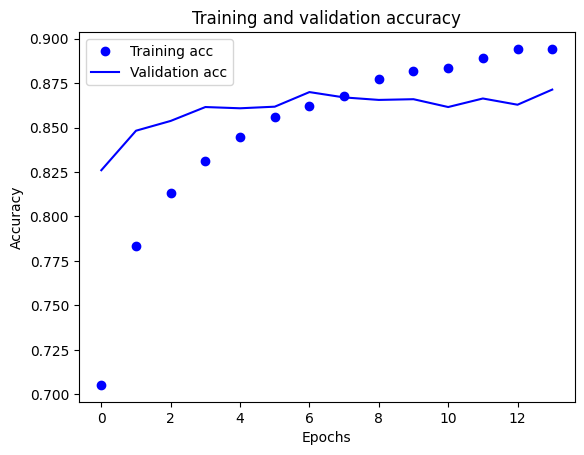

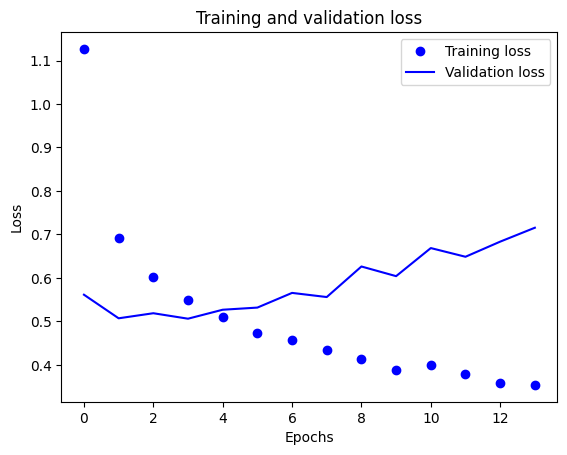

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ModelT_AdamOptimizer_executado.ipynb-10

Nestas duas parcelas seguintes avalia-se o desempenho do modelo nos dados de validação. A função "evaluate" retorna a perda e a precisão do modelo nos dados de validação.


In [71]:
val_loss, val_acc = model.evaluate(val_features, val_labels)
print('Validation Accuracy:', val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8567 - loss: 0.5328
Validation Accuracy: 0.8615000247955322


In [72]:
loss, accuracy = model.evaluate(test_features, test_labels)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8589 - loss: 0.5111
Loss: 0.4991396367549896, Accuracy: 0.8618999719619751


# ModelT_AdamOptimizer_executado.ipynb-11

Aqui avalia-se o desempenho do modelo nos dados de teste. Primeiro, o modelo faz previsões nos recursos do teste. Em seguida, calcula a matriz de confusão e a exibe usando um mapa de calor. Além disso, imprime um relatório de classificação que inclui precisão, recall e pontuação F1 para cada classe. Finalmente,exibe a precisão, recall e pontuação F1 para cada classe.

Os resultados mostram que o modelo tem uma precisão geral de 86%, o que é bastante bom. Isso significa que, em média, o modelo prevê corretamente 86% das vezes.

Ao olhar para as métricas de precisão, recall e F1-score para cada classe, podemos ver que o modelo tem um desempenho variado dependendo da classe. Por exemplo, a classe 3 tem o menor F1-score de 72%, o que indica que o modelo tem mais dificuldade em classificar corretamente essa classe em comparação com as outras. Isso pode ser devido a uma variedade de fatores, como a qualidade dos dados de treinamento para essa classe ou a semelhança dessa classe com outras classes.

Por outro lado, as classes 1, 8 e 9 têm os F1-scores mais altos, todos acima de 90%, o que indica que o modelo é muito bom em classificar corretamente essas classes.

Em termos de recall, a classe 5 tem o menor valor com 73%, o que significa que o modelo tem dificuldade em identificar todos os exemplos positivos reais dessa classe. Isso pode ser um indicativo de que o modelo está classificando muitos exemplos dessa classe incorretamente como outra classe.

Em resumo, embora o modelo tenha um bom desempenho geral, há espaço para melhorias, especialmente para as classes que têm um desempenho inferior, como as classes 3 e 5.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


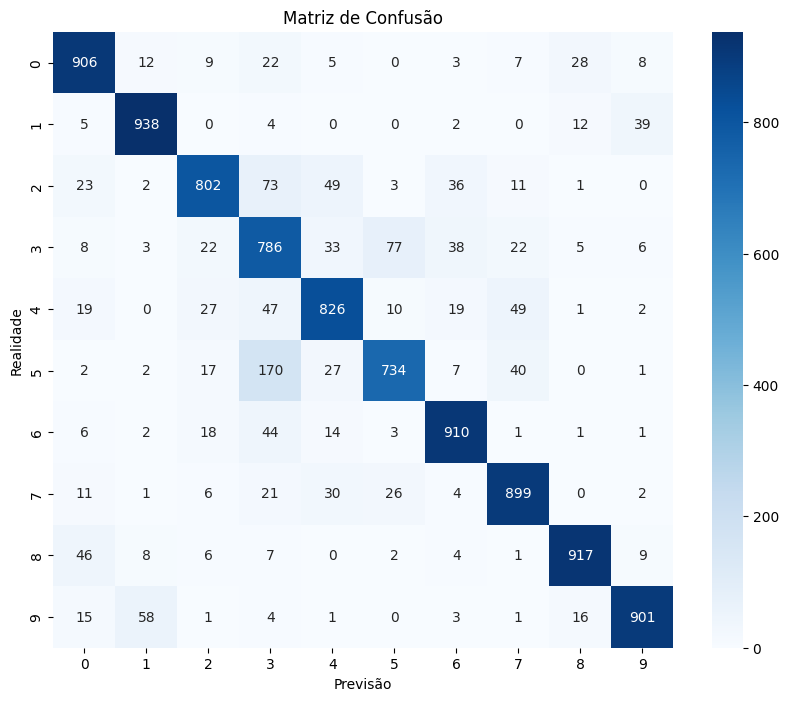

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1000
           1       0.91      0.94      0.93      1000
           2       0.88      0.80      0.84      1000
           3       0.67      0.79      0.72      1000
           4       0.84      0.83      0.83      1000
           5       0.86      0.73      0.79      1000
           6       0.89      0.91      0.90      1000
           7       0.87      0.90      0.89      1000
           8       0.93      0.92      0.93      1000
           9       0.93      0.90      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



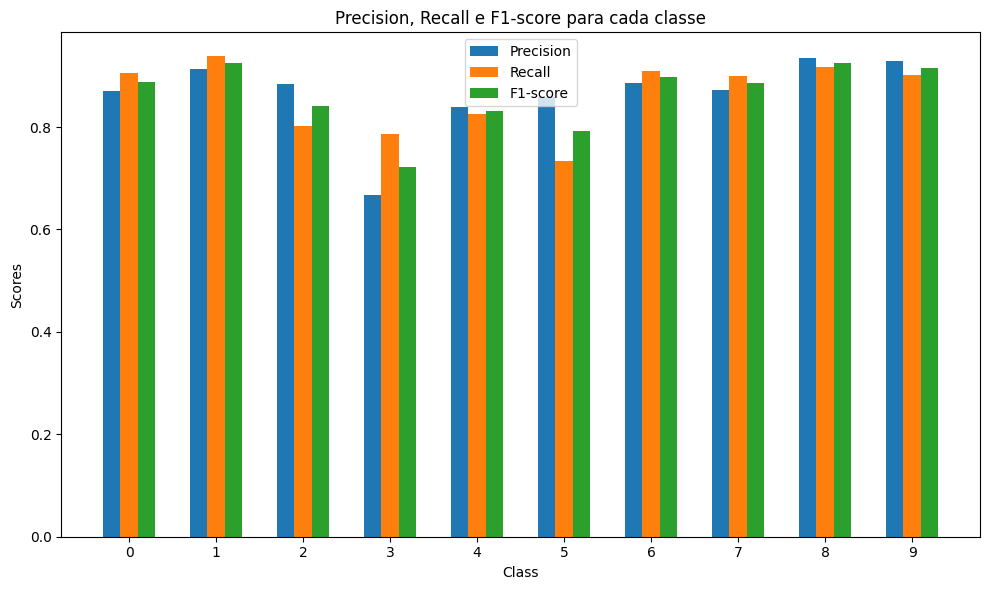

In [73]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, features, labels):
    predictions = model.predict(features)
    predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
    return labels, predicted_labels  # Return true labels and predicted labels

# Obter previsões e rótulos reais para o conjunto de testes
true_labels, predicted_labels = evaluate_model(model, test_features, test_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Print classification report
class_names = [str(i) for i in range(10)]  # Define class names based on your dataset
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Plot precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

metrics = {'precision': [], 'recall': [], 'f1-score': []}
for cls in class_names:
    metrics['precision'].append(report[cls]['precision'])
    metrics['recall'].append(report[cls]['recall'])
    metrics['f1-score'].append(report[cls]['f1-score'])

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, metrics['precision'], bar_width, label='Precision')
plt.bar(index + bar_width, metrics['recall'], bar_width, label='Recall')
plt.bar(index + 2*bar_width, metrics['f1-score'], bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall e F1-score para cada classe')
plt.xticks(index + bar_width, class_names)
plt.legend()

plt.tight_layout()
plt.show()
